### Proyek Analisis Data: AIR QUALITY DATASET
• Nama: Salsabila Amalia Putri
• Email: salsabilaa448@gmail.com

Menentukan Pertanyaaan yang nantinya akan ditampilkan di dashboard
1. Bagaimanakah cuaca setiap jam di tiap daerah?
2. Berapakah suhu Terpanas dan terdingin dan terletah di kota manakah?
3. Berapakah Rata Rata Suhu Pertahun?
4. Berapa persen Kontribusi kota dalam data?
5. Bagaimana Grafik CO, SO, SUHU, O3, PM 10 dan apakah kesimpulannya?


Menyiapkan library yang akan digunakan untuk analisis data

In [2]:
import os #mengakses sistem operasi,memanipulasi berkas, memanajemen
import pandas as pd #ekspor dsn  impor data, data frame
import seaborn as sns #membuat plot statistik, pengaturan warna, style plot
import matplotlib.pyplot as plt #membuat grafik dan plot,
from scipy.stats import zscore #

### Data Wrangling

#### Gathering Data| Menggabungkan semua data pada file csv untuk dijadikan 1 file

In [3]:

# Tentukan direktori tempat file CSV berada
directory = 'data' #nama folder

# Inisialisasi list kosong untuk menyimpan DataFrames dari setiap file CSV
dataframes = []

# Loop melalui semua file dalam direktori
for filename in os.listdir(directory): #os.listdir: Mengembalikan daftar semua file dan direktori dalam path yang diberikan (default adalah direktori saat ini).
    if filename.endswith('.csv'):
        # Membaca setiap file CSV dan mengubahnya menjadi DataFrame
        filepath = os.path.join(directory, filename) #os.path.join(path1, path2, ...): Menggabungkan beberapa bagian path menjadi satu path lengkap sesuai dengan sistem operasi yang digunakan.
        df = pd.read_csv(filepath)
        dataframes.append(df)# mengumpulkan beberapa DataFrame menjadi satu list

# Menggabungkan semua DataFrames menjadi satu
data = pd.concat(dataframes, ignore_index=True)

#### Assessing Data

Melihat beberapa data di baris awal untuk memastikan apakah data yang digabungkan sudah benar

In [4]:
data.head()
# digunakan untuk melihat beberapa baris awal dari DataFrame
# digunakan untuk memahami struktur data
# mengonfirmasi data (sdh dimuat dgn benar atau blm)
# () bisa diisikan angka fungsinya untuk menampilkan data sejumlah angka yang telah ditentukan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


menghitung panjang data yang nantinya bisa digunakan untuk memastikan hasil pemrosesan data

In [5]:
len(data)#Menghitung jumlah baris untuk memastikan jumlah data yang digabungkan sudah benar atau belum

420768

eksport file ke xlsx untuk memastikan data data yang mau diproses agar menggunakan langkah yang sesuai untuk data cleaning

In [6]:
# Nama file yang akan disimpan
output_filename = "cuaca_file.xlsx"

# Memeriksa apakah file lama sudah ada, jika ada maka akan dihapus
if os.path.exists(output_filename):
    os.remove(output_filename)
    print("File lama dihapus.")

# Menyimpan data frame ke dalam file Excel
data.to_excel(output_filename, index=False)
print(f"Hasil analisis disimpan dalam file: {output_filename}")

File lama dihapus.
Hasil analisis disimpan dalam file: cuaca_file.xlsx


### Data Cleaning

Melihat jumlah data yang kosong pada setiap kolomnya

In [7]:
data.isnull().sum() #menunjukkan jumlah nilai null dalam setiap kolom DataFrame

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Melihat apakah ada data yang terduplikat

In [8]:
data.duplicated().sum()#melihat data yang terduplikat

0

Mengisi missing value dengan rata rata data yang ada

In [9]:
import numpy as np

In [10]:

#menggunakan teknik imputasi(MENGISI NILAI YG KOSOSNG) dengan rata rata 
# Menentukan kolom numerik
numeric_columns = data.select_dtypes(include=np.number).columns

# Mengisi nilai kosong pada kolom numerik dengan rata-rata
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


Memastikan lagi apakah masih ada data yang kosong

In [11]:
data.isna().sum()#menghitung jumlah NaN 

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

Menghapus data missing value

In [12]:

data.dropna(axis=0, inplace=True)

Mengidentifikasi outlier dalam data numerik menggunakan metode Interquartile
#Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang IQR (Interquartile Range).
#Menghitung batas bawah dan batas atas untuk outlier berdasarkan nilai Q1, Q3, dan IQR dengan menggunakan aturan 1.5 * IQR di bawah Q1 dan di atas Q3.


In [13]:
def detect_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns_to_check = data.select_dtypes(include=['number']).columns
outliers_dict = {}

for column in columns_to_check:
    outliers = detect_outliers_IQR(data, column)
    outliers_dict[column] = outliers

# Menampilkan hasil outlier untuk setiap kolom
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers)




Outliers in No:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []
Outliers in year:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []
Outliers in month:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []
Outliers in day:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []
Outliers in hour:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []
Outliers in PM2.5:
           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
120       121  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0   
121       122  2013      3    6     1  272.0  300

Menghapus data outlier

In [14]:
# Menghitung z-score untuk setiap kolom yang akan diolah
z_scores = data[columns_to_check].apply(zscore)

# Mengidentifikasi outlier berdasarkan z-score yang melebihi threshold tertentu (misalnya 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Menghapus data yang memiliki outlier
data[~outliers]

# Menyimpan dataset yang telah dibersihkan dari outlier
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [15]:
data.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

mendefinisikan korelasi data untuk melihat kedekatan hubungan antar data

In [16]:
kol = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

korelasi =kol.corr() #melihat korelasi
print(korelasi)
''' 
    Nilai positif mendekati 1 menunjukkan korelasi positif sempurna. Variabel bergerak ke arah yang sama dengan nilai yang sama
    Nilai negatif mendekati -1 menunjukkan korelasi negatif sempurna. Variabel bergerak berlawanan arah. Satu meningkat satu lagi menurun
    Nilai mendekati 0 menunjukkan tidak adanya korelasi atau korelasi yang lemah.
'''

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879356  0.478201  0.658206  0.768536 -0.146719 -0.128970   
PM10   0.879356  1.000000  0.459096  0.645610  0.686620 -0.109560 -0.094776   
SO2    0.478201  0.459096  1.000000  0.491751  0.525584 -0.162888 -0.318380   
NO2    0.658206  0.645610  0.491751  1.000000  0.688356 -0.463551 -0.273427   
CO     0.768536  0.686620  0.525584  0.688356  1.000000 -0.304982 -0.317143   
O3    -0.146719 -0.109560 -0.162888 -0.463551 -0.304982  1.000000  0.585435   
TEMP  -0.128970 -0.094776 -0.318380 -0.273427 -0.317143  0.585435  1.000000   
PRES   0.017800 -0.018355  0.220488  0.170484  0.182460 -0.438742 -0.813282   
DEWP   0.114297  0.070361 -0.263526 -0.030561 -0.054796  0.308186  0.820243   
RAIN  -0.014082 -0.026312 -0.040060 -0.043288 -0.012922  0.023066  0.037622   
WSPM  -0.268949 -0.181700 -0.108682 -0.393890 -0.289717  0.289969  0.030776   

           PRES      DEWP      RAIN      WSPM  
PM2

' \n    Nilai positif mendekati 1 menunjukkan korelasi positif sempurna. Variabel bergerak ke arah yang sama dengan nilai yang sama\n    Nilai negatif mendekati -1 menunjukkan korelasi negatif sempurna. Variabel bergerak berlawanan arah. Satu meningkat satu lagi menurun\n    Nilai mendekati 0 menunjukkan tidak adanya korelasi atau korelasi yang lemah.\n'

### Exploratory Data Analysis (EDA)

Membuat grafik heatmap untuk korelasi untuk mempermudah identifikasi

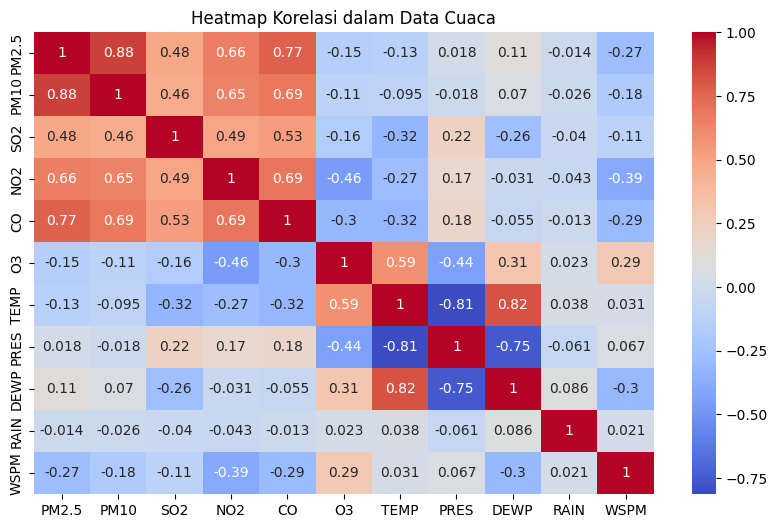

In [17]:

plt.figure(figsize=(10, 6)) #membuat figur (grafik) dengan ukuran 10x6 inci
sns.heatmap(korelasi, annot=True, cmap='coolwarm') # membuat heatmap berdasarkan matriks korelasi 
#annot= memunculkan angka korelasi pada heatmap
plt.title('Heatmap Korelasi dalam Data Cuaca')
plt.show()


In [18]:
data.columns 

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [19]:
data['wd']

0         NNW
1           N
2         NNW
3          NW
4           N
         ... 
420763     NW
420764    WNW
420765     NW
420766    NNW
420767    NNE
Name: wd, Length: 418946, dtype: object

membuat perkiraan dengan pertimbangan suhu, rain, dan arah mata angin

In [20]:
def prediksi_cuaca(row):
    if row['TEMP'] > 30:#jika suhy lebih dari 30 dikategorikan panas
        return 'Panas'
    elif row['RAIN'] > 0:
        return 'Hujan' #jika nilai rain lebih dari 0 maka cuacanya hujan
    elif row['wd'] in ['NE', 'N', 'NNE', 'ENE', 'E']:
        return 'Cerah'  # Cuaca cerah untuk arah angin ini
    elif row['wd'] in ['ESE', 'SE', 'SSE', 'S', 'SSW']:
        return 'Badai'  # Cuaca badai untuk arah angin ini
    elif row['wd'] in ['SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']:
        return 'Mendung'  # Cuaca mendung untuk arah angin ini
    else:
        return 'Berawan'  # Cuaca berawan jika tidak ada kondisi yang cocok



Menambah kolom baru yaitu kolom tanggal dan waktu

In [21]:

data['day'] = pd.to_numeric(data['day'])
data['month'] = pd.to_numeric(data['month'])
data['year'] = pd.to_numeric(data['year'])

data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

data['tanggal'] = data['tanggal'].dt.date


In [22]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'tanggal'],
      dtype='object')

Menambahkan kolom hasil prediksi cuaca

In [24]:
data['weather_condition'] = data.apply(prediksi_cuaca, axis=1) #membuat kolom baru dgn menerapkan fungsi prediksi cuaca
data.to_csv('cuaca.csv', index=False)


## Export

In [25]:
# Nama file yang akan disimpan
output_filename = "dashboard/cuaca_fix.xlsx"

# Memeriksa apakah file lama sudah ada, jika ada maka akan dihapus
if os.path.exists(output_filename):
    os.remove(output_filename)
    print("File lama dihapus.")

# Menyimpan data frame ke dalam file Excel
data.to_excel(output_filename, index=False)
print(f"Hasil analisis disimpan dalam file: {output_filename}")

File lama dihapus.
Hasil analisis disimpan dalam file: dashboard/cuaca_fix.xlsx


In [26]:
# Nama file yang akan disimpan
output_filename = "dashboard/cuaca.csv"

# Memeriksa apakah file lama sudah ada, jika ada maka akan dihapus
if os.path.exists(output_filename):
    os.remove(output_filename)
    print("File lama dihapus.")

# Menyimpan data frame ke dalam file Excel
data.to_csv(output_filename, index=False)
print(f"Hasil analisis disimpan dalam file: {output_filename}")

File lama dihapus.
Hasil analisis disimpan dalam file: dashboard/cuaca.csv


## Visualization & Explanatory Analysis

### Pertanyaan 1: Perkiraan cuaca setiap jam di tiap daerah
//Ada di dashboard

### Pertanyaan 2: melihat kota dengan suhu terdingin dan terpanas

In [27]:
# Tampilkan kota-kota terdingin di kolom pertama
city_temperatures = data.groupby('station')['TEMP'].min().reset_index()
coldest_cities = city_temperatures.sort_values(by='TEMP', ascending=True).head(3)
coldest_cities['TEMP'] = coldest_cities['TEMP'].round(1).astype(str) + ' °C'
print('Suhu Terdingin:')
print(coldest_cities[['station', 'TEMP']].to_string(index=False))

# Tampilkan kota-kota terpanas di kolom kedua
city_temperatures = data.groupby('station')['TEMP'].max().reset_index()
top_cities = city_temperatures.sort_values(by='TEMP', ascending=False).head(3)
top_cities['TEMP'] = top_cities['TEMP'].round(1).astype(str) + ' °C'
print('\nSuhu Terpanas:')
print(top_cities[['station', 'TEMP']].to_string(index=False))

Suhu Terdingin:
     station     TEMP
     Huairou -19.9 °C
Aotizhongxin -16.8 °C
      Dongsi -16.8 °C

Suhu Terpanas:
  station    TEMP
  Gucheng 41.6 °C
Changping 41.4 °C
 Dingling 41.4 °C


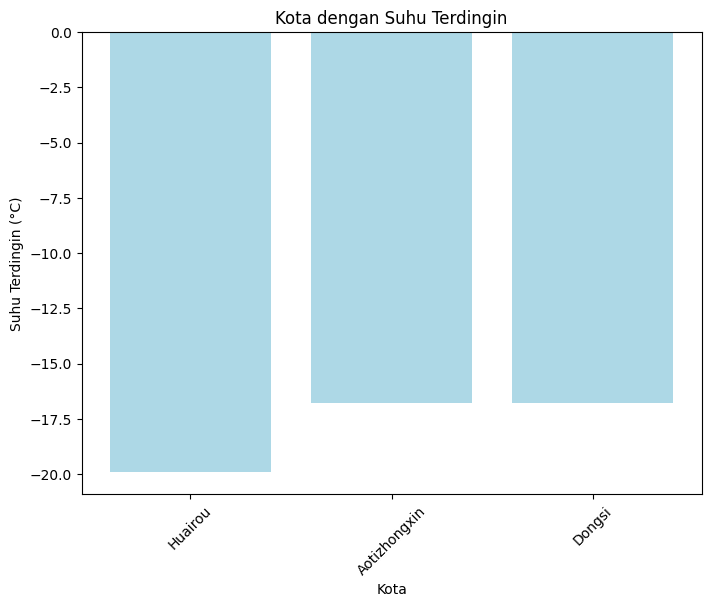

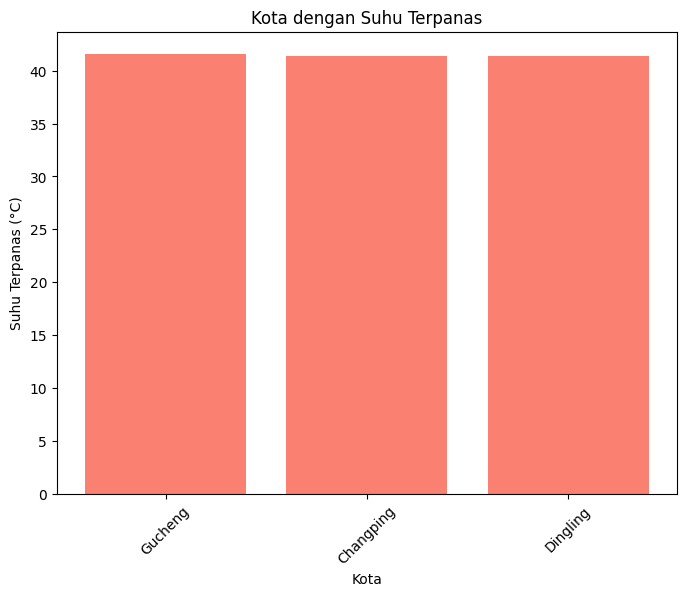

In [28]:

# Suhu Terdingin
city_temperatures_min = data.groupby('station')['TEMP'].min().reset_index()
coldest_cities = city_temperatures_min.sort_values(by='TEMP', ascending=True).head(3)

# Suhu Terpanas
city_temperatures_max = data.groupby('station')['TEMP'].max().reset_index()
top_cities = city_temperatures_max.sort_values(by='TEMP', ascending=False).head(3)

# Membuat plot untuk suhu terdingin
plt.figure(figsize=(8, 6))
plt.bar(coldest_cities['station'], coldest_cities['TEMP'], color='lightblue')
plt.xlabel('Kota')
plt.ylabel('Suhu Terdingin (°C)')
plt.title('Kota dengan Suhu Terdingin')
plt.xticks(rotation=45)
plt.show()

# Membuat plot untuk suhu terpanas
plt.figure(figsize=(8, 6))
plt.bar(top_cities['station'], top_cities['TEMP'], color='salmon')
plt.xlabel('Kota')
plt.ylabel('Suhu Terpanas (°C)')
plt.title('Kota dengan Suhu Terpanas')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3: Melihat rata rata suhu pertahunnya

In [29]:
rata_rata_temp_2017 = df[df['year'] == 2017]['TEMP'].mean().round(2)
rata_rata_temp_2016 = df[df['year'] == 2016]['TEMP'].mean().round(2)
rata_rata_temp_2015 = df[df['year'] == 2015]['TEMP'].mean().round(2)
rata_rata_temp_2014 = df[df['year'] == 2014]['TEMP'].mean().round(2)
rata_rata_temp_2013 = df[df['year'] == 2013]['TEMP'].mean().round(2)
print("Rata-rata kolom TEMP untuk tahun 2017 adalah:", rata_rata_temp_2017)
print("Rata-rata kolom TEMP untuk tahun 2016 adalah:", rata_rata_temp_2016)
print("Rata-rata kolom TEMP untuk tahun 2015 adalah:", rata_rata_temp_2015)
print("Rata-rata kolom TEMP untuk tahun 2014 adalah:", rata_rata_temp_2014)
print("Rata-rata kolom TEMP untuk tahun 2013 adalah:", rata_rata_temp_2013)

Rata-rata kolom TEMP untuk tahun 2017 adalah: 0.67
Rata-rata kolom TEMP untuk tahun 2016 adalah: 13.86
Rata-rata kolom TEMP untuk tahun 2015 adalah: 13.56
Rata-rata kolom TEMP untuk tahun 2014 adalah: 14.29
Rata-rata kolom TEMP untuk tahun 2013 adalah: 15.85


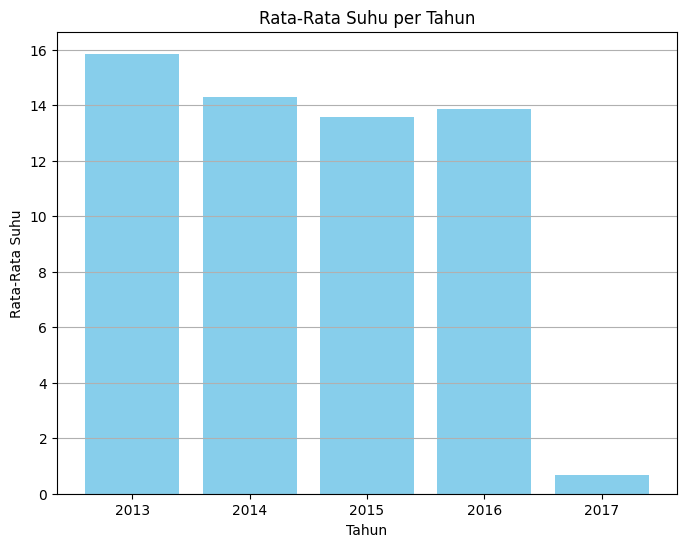

In [30]:

# Menghitung rata-rata suhu per tahun
avg_temp = df.groupby('year')['TEMP'].mean().reset_index()

# Membuat grafik rata-rata suhu per tahun
plt.figure(figsize=(8, 6))
plt.bar(avg_temp['year'], avg_temp['TEMP'], color='skyblue')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Suhu')
plt.title('Rata-Rata Suhu per Tahun')
plt.xticks(avg_temp['year'])  # Menampilkan semua tahun di sumbu x
plt.grid(axis='y')  # Menambahkan grid hanya pada sumbu y
plt.show()

### Pertanyaan 4 : Kontribusi kota dalam data.

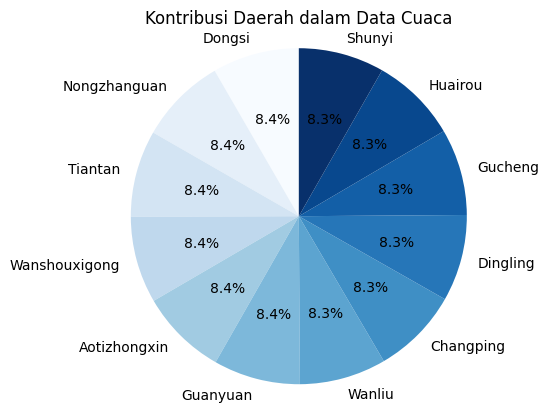

In [31]:

# Menghitung kontribusi daerah
station_ct = data['station'].value_counts()

# Warna gradien
colors = plt.cm.Blues(np.linspace(0, 1, len(station_ct)))

fig, ax = plt.subplots()
pie_wedge_collection = ax.pie(station_ct.values, labels=station_ct.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Agar diagram lingkaran menjadi lingkaran sempurna

# Mengatur gradien warna untuk setiap irisan
for i, pie_wedge in enumerate(pie_wedge_collection[0]):
    pie_wedge.set_facecolor(colors[i])

# Tampilkan diagram lingkaran
plt.title("Kontribusi Daerah dalam Data Cuaca")
plt.show()

### Pertanyaan 5:Grafik CO, SO, SUHU, O3, PM10
//Ada di dashboard

## Kesimpulan

1.   Berdasarkan data cuaca tanggal 1 Maret 2013 untuk Aotizhongxin yang ditampilkan, berikut ini adalah analisis dan kesimpulan yang dapat ditarik:

   - Suhu berada pada kisaran sub-zero (di bawah titik beku) pada jam-jam awal, dengan titik terendah -2.6°C pada pukul 06:00.
   - Terjadi peningkatan suhu dari jam 07:00, dengan suhu kembali ke atas titik beku (0.1°C) pada pukul 08:00.
   -  Kondisi cuaca bergantian antara cerah dan mendung, dengan lebih banyak periode mendung di awal hari.
   - Tidak ada hujan yang tercatat selama periode waktu ini (kolom RAIN menunjukkan 0).
   -  Arah angin dominan adalah dari Utara hingga Utara-Barat Laut (N hingga NNW), dengan perubahan arah yang konsisten sesuai dengan waktu dalam sehari.

2.      Suhu terdingin:
        Huairou: -19.9°C
        Aotizhongxin: -16.8°C
        Dongsi: -16.8°C

        Suhu terpanas:
        Gucheng: 41.6°C
        Changping: 41.4°C
        Dingling: 41.4°C

3.      Tahun 2013: Rata-rata suhu sekitar 15.85°C.
        Tahun 2014: Rata-rata suhu sekitar 14.29°C.
        Tahun 2015: Rata-rata suhu sekitar 13.56°C.
        Tahun 2016: Rata-rata suhu sekitar 13.86°C.
        Tahun 2017: Rata-rata suhu jauh lebih rendah, yaitu 0.67°C.

Ada penurunan rata-rata suhu dari tahun 2013 hingga 2016, dengan penurunan tajam pada tahun 2017.

4. :

    - Diagram menunjukkan kontribusi relatif yang merata dari berbagai daerah terhadap data cuaca yang dikumpulkan atau dianalisis.
    - Setiap daerah memberikan kontribusi yang hampir sama, dengan persentase antara 8.3% dan 8.4%.
    - Daerah-daerah tersebut adalah Dongsi, Shunyi, Huairou, Gucheng, Dingling, Changping, Wanliu, Guanyuan, Aotizhongxin, Wanshouxigong, Tiantan Nongzhanguan.

Kesimpulan yang dapat ditarik adalah bahwa data cuaca yang dikumpulkan telah didistribusikan secara merata di antara daerah-daerah yang disebutkan, menunjukkan bahwa tidak ada bias lokasi yang signifikan dalam pengumpulan data ini. Ini menunjukkan upaya untuk mendapatkan gambaran cuaca yang seimbang dan representatif dari semua area yang tercantum.


5. :
    Grafik tanggal 1 Maret 2013:

    - O3 (Ozon): Memiliki fluktuasi tertinggi sepanjang hari, dengan puncaknya di pertengahan hari dan penurunan tajam setelah jam 17:00.
    - PM10 (Partikulat ukuran 10 mikrometer atau lebih kecil): Meningkat secara bertahap selama hari dan mencapai puncaknya di malam hari.
    - SO2 (Dioksida Sulfur): Fluktuasinya relatif kecil dibandingkan dengan O3 dan PM10, dengan sedikit kenaikan pada sore hari.
    - TEMP (Temperatur): Memiliki nilai negatif pada awal hari, menunjukkan suhu di bawah titik beku, dan meningkat sepanjang hari hingga sore hari sebelum mulai turun lagi di malam hari.

Kesimpulan yang dapat ditarik adalah bahwa tingkat polusi, terutama ozon, meningkat hingga tengah hari dan menurun di sore hari. Polutan PM10 menunjukkan peningkatan sepanjang hari yang mungkin terkait dengan aktivitas harian dan lalu lintas. Suhu naik dari titik beku di pagi hari hingga lebih hangat di siang hari, kemudian turun lagi setelah matahari terbenam. Dioksida sulfur memiliki tingkat fluktuasi yang lebih sedikit dibandingkan dengan ozon dan partikulat.

In [ ]:
!pip freeze > requirements.txt